#Set up Colab and Drive for Project

In [32]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
%cd '/content/gdrive/My Drive/MVP Datensatz/'
train_dir = 'Trainingsdatensatz5'

/content/gdrive/My Drive/MVP Datensatz


In [0]:
from keras import optimizers
from keras import layers
from keras import models
from keras import initializers

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import backend as K


#Create Base Model

In [107]:
# VGG19
img_width = 224
img_height = 224

from keras.applications import VGG19
base_model = VGG19(
  weights = 'imagenet',
  include_top = False,
  input_shape = (img_width,img_height,3) 
 )

80142336/80134624 [==============================] - 7s 0us/step


##Base Model Summary

In [108]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#Create Training and Validation Set

##Augmentations


In [0]:
featurewise_center = False
samplewise_center = False
featurewise_std_normalization = False
samplewise_std_normalization = False
zca_whitening = False
horizontal_flip = False
vertical_flip = False

brightness_range = None 
preprocessing_function = None

zca_epsilon = 0
rotation_range = 0
width_shift_range = [-1, 0, +1]
height_shift_range = [-1, 0, +1]
shear_range = 0.0
zoom_range = 0.2
channel_shift_range = 0.0
cval = 0.0
interpolation_order = 1

fill_mode = 'nearest'
data_format = 'channels_last'


##Preparing Data

In [0]:
batch_s = 10

validation_split = 0.4
rescale = 1./255

In [0]:
train_datagen = ImageDataGenerator(
    featurewise_center = featurewise_center,
    samplewise_center = samplewise_center,
    featurewise_std_normalization = featurewise_std_normalization,
    samplewise_std_normalization = samplewise_std_normalization,
    zca_whitening = zca_whitening,
    zca_epsilon = zca_epsilon,
    rotation_range = rotation_range,
    width_shift_range = width_shift_range,
    height_shift_range = height_shift_range,
    brightness_range = brightness_range,
    shear_range = shear_range,
    zoom_range = zoom_range,
    channel_shift_range = channel_shift_range,
    fill_mode = fill_mode,
    cval = cval,
    horizontal_flip = horizontal_flip,
    vertical_flip = vertical_flip,
    preprocessing_function = preprocessing_function,
    data_format = data_format,
    validation_split = validation_split,
    interpolation_order = interpolation_order,
    rescale = rescale,
    dtype = 'float32')

In [122]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width,img_height),
    batch_size = batch_s,
    class_mode = 'categorical',
    subset = 'training')

Found 84 images belonging to 5 classes.


In [0]:
train_set.class


In [124]:
validation_set = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (img_width,img_height),
    batch_size = batch_s,
    class_mode = 'categorical',
    subset = 'validation')

Found 54 images belonging to 5 classes.


#Create and Train Model

In [0]:
opt = optimizers.RMSprop(learning_rate=0.001)
epochs = 1000

In [0]:
model = models.Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu', kernel_initializer = initializers.RandomNormal(stddev = 0.01), bias_initializer = initializers.Zeros()))
model.add(layers.Dense(5, activation = 'sigmoid', kernel_initializer = initializers.RandomNormal(stddev = 0.01), bias_initializer = initializers.Zeros()))
model.compile(optimizer = opt,loss = 'categorical_crossentropy', metrics = ['acc'])
model.fit_generator(train_set, epochs = epochs, validation_data = validation_set)

##Model Summary

In [0]:
model.summary()

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


##Testing Model

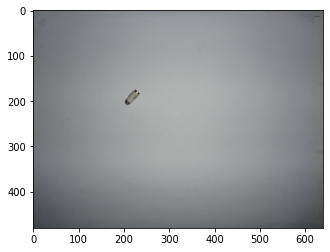

In [156]:
bild = 'Testbilder/P1040709.JPG'
im = plt.imread(bild)

plt.imshow(im)
plt.show()


In [0]:
AB = image.load_img(bild, target_size=(img_width, img_height))
AB = image.img_to_array(AB)
AB = np.expand_dims(AB, axis=0)

In [158]:
test_prediction = model.predict(AB)
test_prediction = test_prediction.flatten()
test_prediction

array([1., 0., 0., 0., 0.], dtype=float32)

In [133]:
model.predict_classes(AB)

array([0])

##Save Model

In [0]:
model.save("/content/gdrive/My Drive/Keras Models/Xception_5-1.h5")


#Load Validation Images

In [0]:
folder_path = 'Testbilder'

In [0]:
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

#Predict Classes

In [161]:
images = np.vstack(images)
classes = model.predict_classes(images)
print(classes)

[0 1 0 0 0 0 0 0 2 2 2 0 2 0 0 2 0 0 2 0 0 2 2 1 0 2 0 2 0 0 2 0 0 0 0 1 1
 2 2 0 1 1 0 0 2 0 0 0 1 0 1 0 0 0 2 0 0]


#Evaluation


In [168]:
classes = model.predict_classes(images)
con_mat = math.confusion_matrix(labels = y_true, predictions = classes).np()
con_mat

NameError: ignored

#Perform Classification

In [0]:
Abfragebild = 'Testbilder/P1040699.JPG'

Speicherort_KI_Modell = '/content/gdrive/My Drive/Keras Models'
Name_KI_Modell = '/Xception_5-1.h5'

In [0]:
import json
def Vorhersage(Artikelfoto, Speicherort_KI_Modell, Name_KI_Modell):

    model = models.load_model(Speicherort_KI_Modell + Name_KI_Modell)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
    Artikelfoto = image.load_img(Artikelfoto, target_size=(img_width, img_height))
    Artikelfoto = image.img_to_array(Artikelfoto)
    Artikelfoto = np.expand_dims(Artikelfoto, axis=0)
    prediction = model.predict(Artikelfoto)
    prediction = prediction.flatten()
    artikelnummer = 'Art' + str(np.argmax(prediction)+1)
    wahrscheinlichkeit = str(prediction[np.argmax(prediction)])

    response = json.dumps({"Artikelnummer":artikelnummer, "Wahrscheinlichkeit":wahrscheinlichkeit})

    return response

In [164]:
Vorhersage(Abfragebild, Speicherort_KI_Modell, Name_KI_Modell)

'{"Artikelnummer": "Art1", "Wahrscheinlichkeit": "1.0"}'